In [4]:
%run ../common-imports.ipynb

#  Old faithful geyser: k-Means Clustering



find clusters in this dataset.

In [5]:
source = '../../datasets/old-faithful-geyser.csv'
raw_data = pd.read_csv(source, sep='\t')
scaler = StandardScaler()
scaled = scaler.fit_transform(raw_data)
data = pd.DataFrame(data={'eruptions':scaled[:, 0], 'waiting': scaled[:,1]})
data.describe(include="all").transpose()#.style.set_table_styles(sv_table_styles())

,count,mean,std,min,25%,50%,75%,max
eruptions,272.0,5.053147e-16,1.001843,-1.657009,-1.163053,0.449601,0.84832,1.415130
waiting,272.0,4.398034e-16,1.001843,-2.055795,-0.950412,0.376047,0.81820,1.849891


**Sample rows**

In [6]:
data.sample(5)

,eruptions,waiting
30,0.712927,0.154970
116,-1.027660,-1.539950
79,0.098499,0.891892
127,0.888478,0.818200
196,0.010723,1.186661


## Data Visualization

To whet our recollection of the key data exploration findings, let us mention some of the plots of the dataset.

first visualize a scatter plot of the data and look at the histogram of the features. Finally, let us pull of this together with a kernel density plot, into a single plot with subplots.

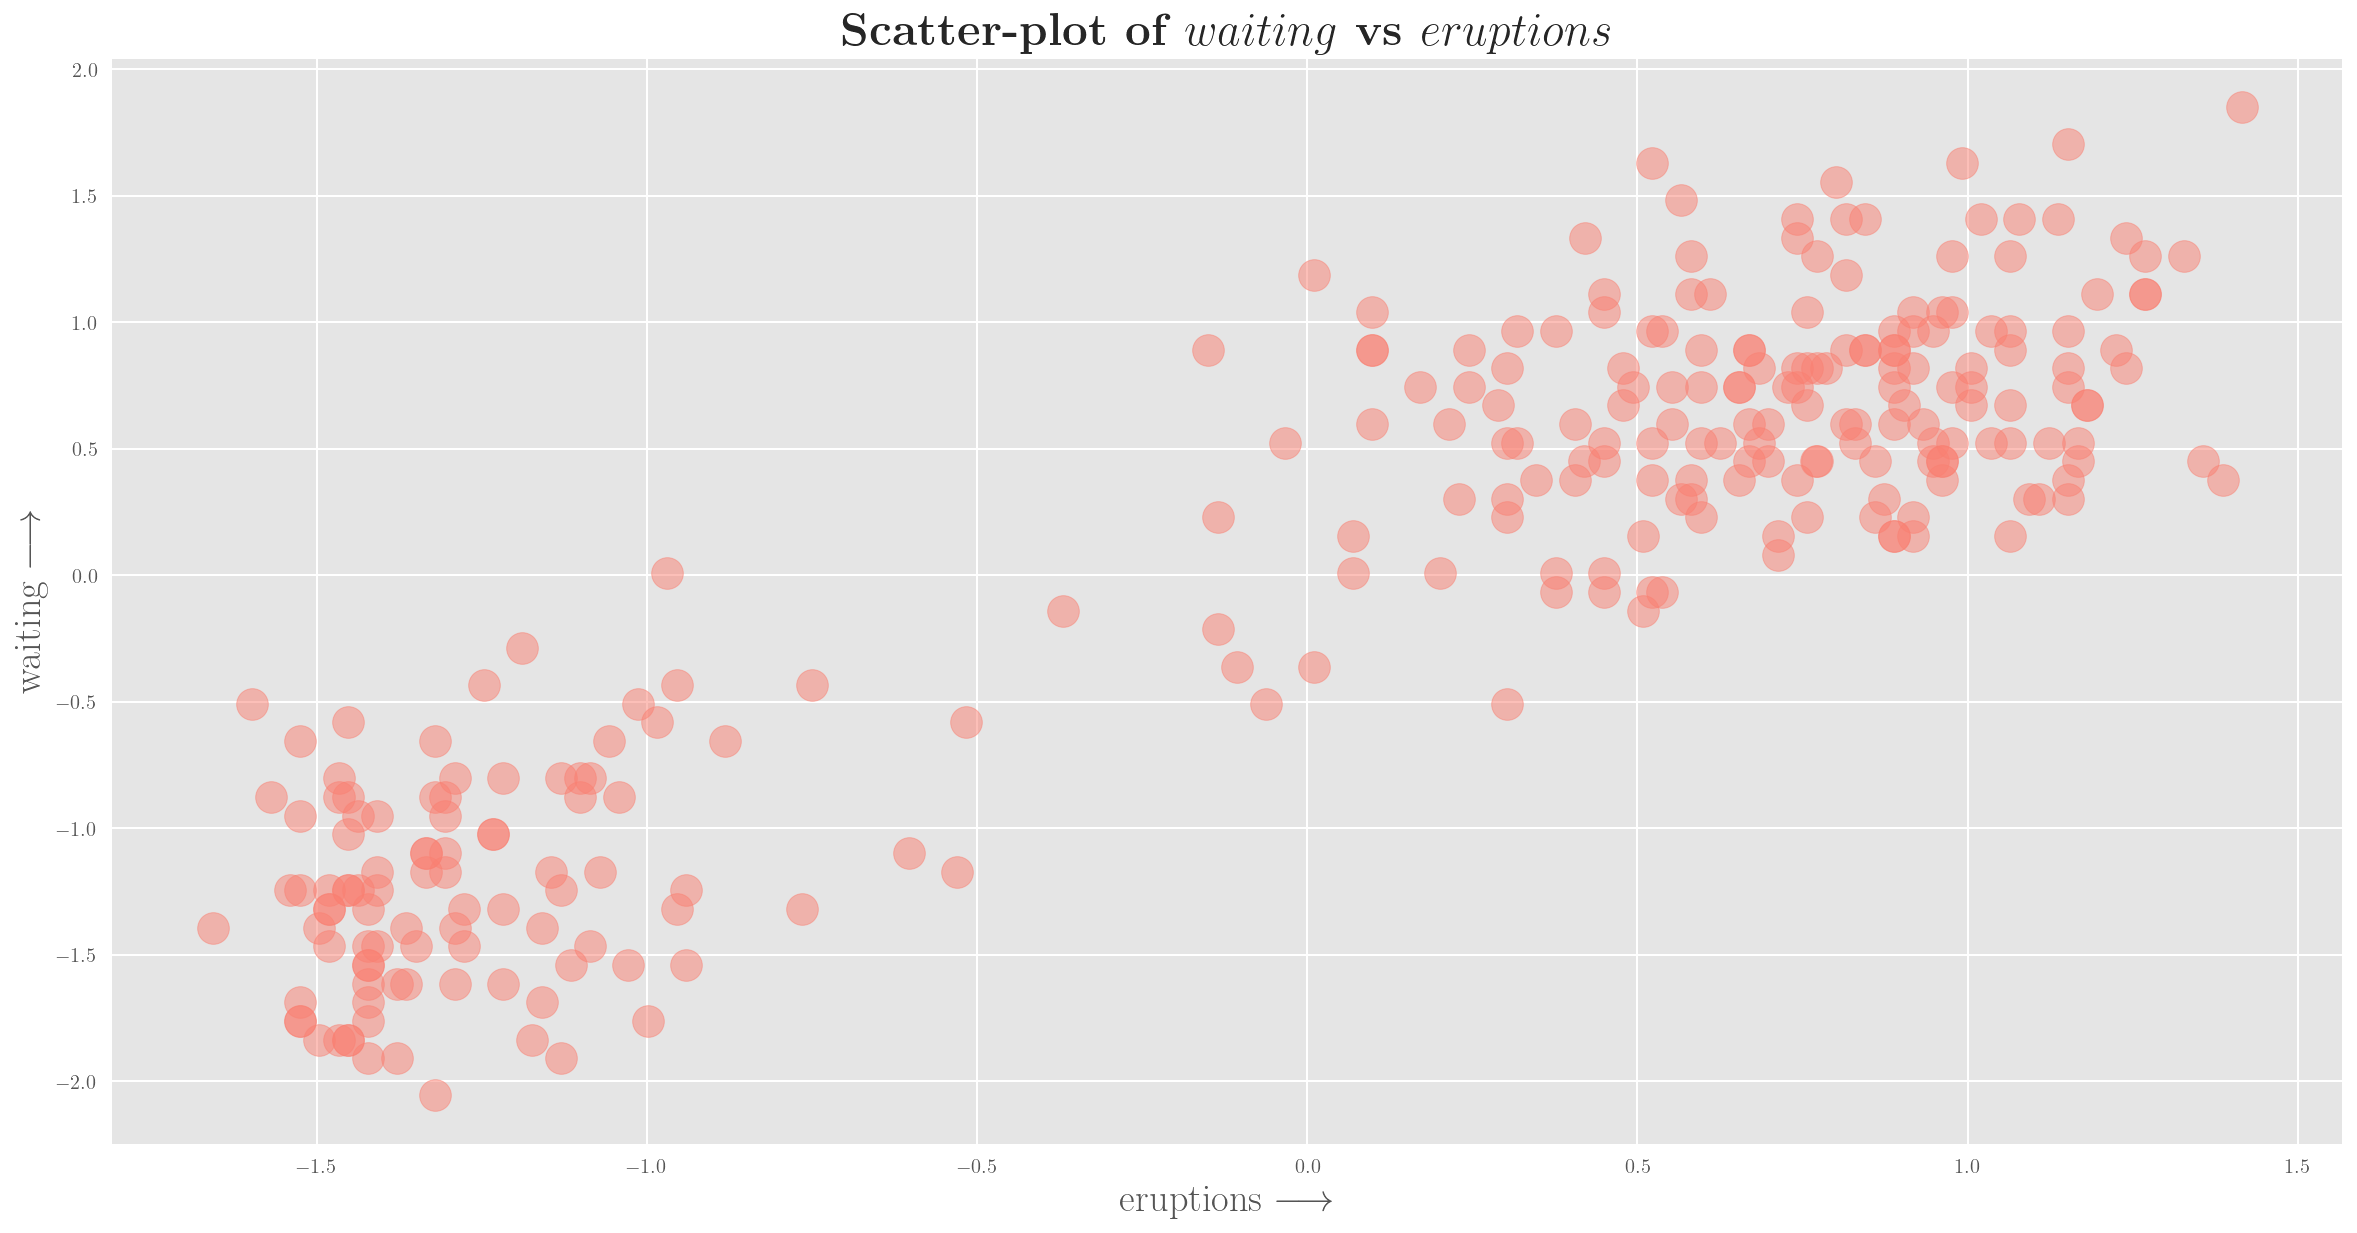

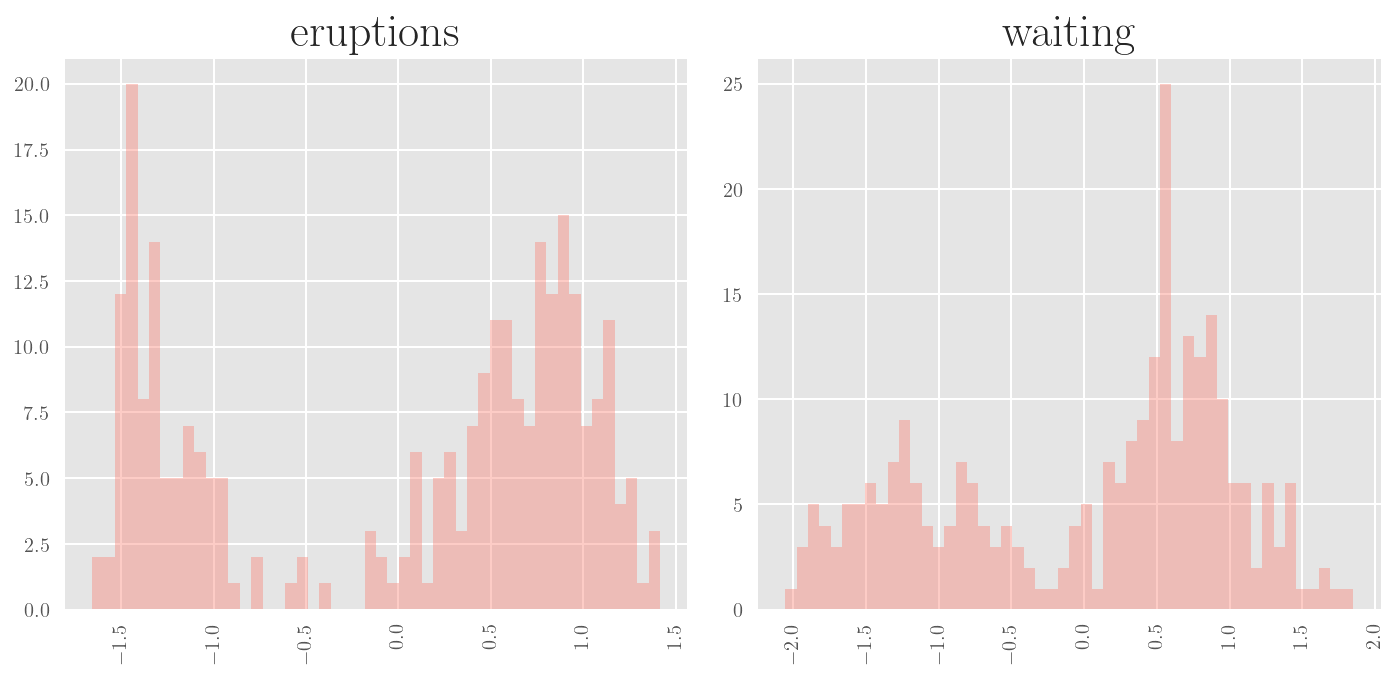

In [7]:
plt.scatter(data['eruptions'], data['waiting'], alpha=0.5, s=250, color='salmon')
plt.title(r'\textbf{Scatter-plot of $waiting$ vs $eruptions$}')
plt.xlabel(r'eruptions $\longrightarrow$');
plt.ylabel(r'waiting $\longrightarrow$');
plt.show();
data.hist(bins=50, alpha = 0.4, color='salmon', xrot=90, figsize=(10,5));
plt.tight_layout()

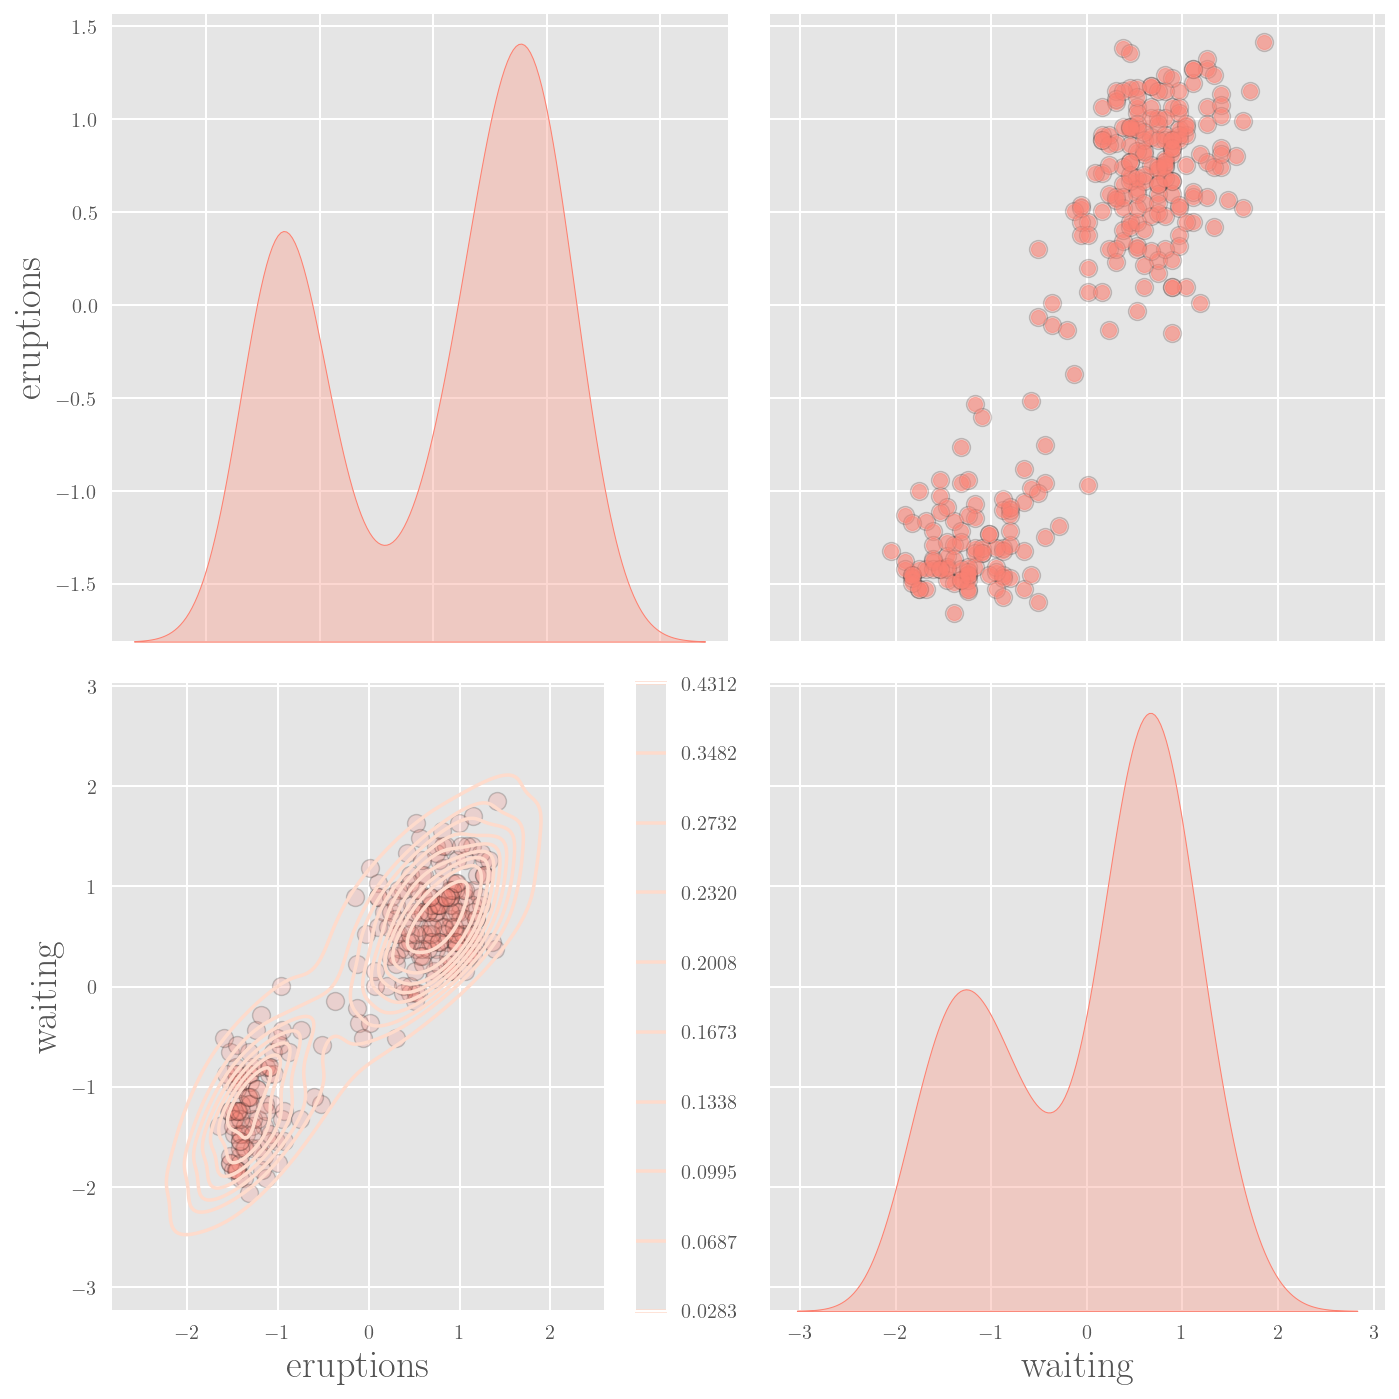

In [8]:
sns.set_palette("Reds")

sample = data
g = sns.pairplot(sample, diag_kind='kde', 
                   plot_kws = { 'alpha': 0.20, 's': 80, 'edgecolor': 'k', 'color':'salmon'}, 
                   size=5, );
g.map_diag(sns.kdeplot, color='salmon',  shade=True);
g.map_upper(plt.scatter, color='salmon', alpha=0.5);
g.map_lower(sns.kdeplot, shade=False, shade_lowest=False, cbar=True);

plt.tight_layout()

## k-Means Clustering

Let us now cluster this data for various values of the hyper-parameter: $k$ (the number of clusters to detect).

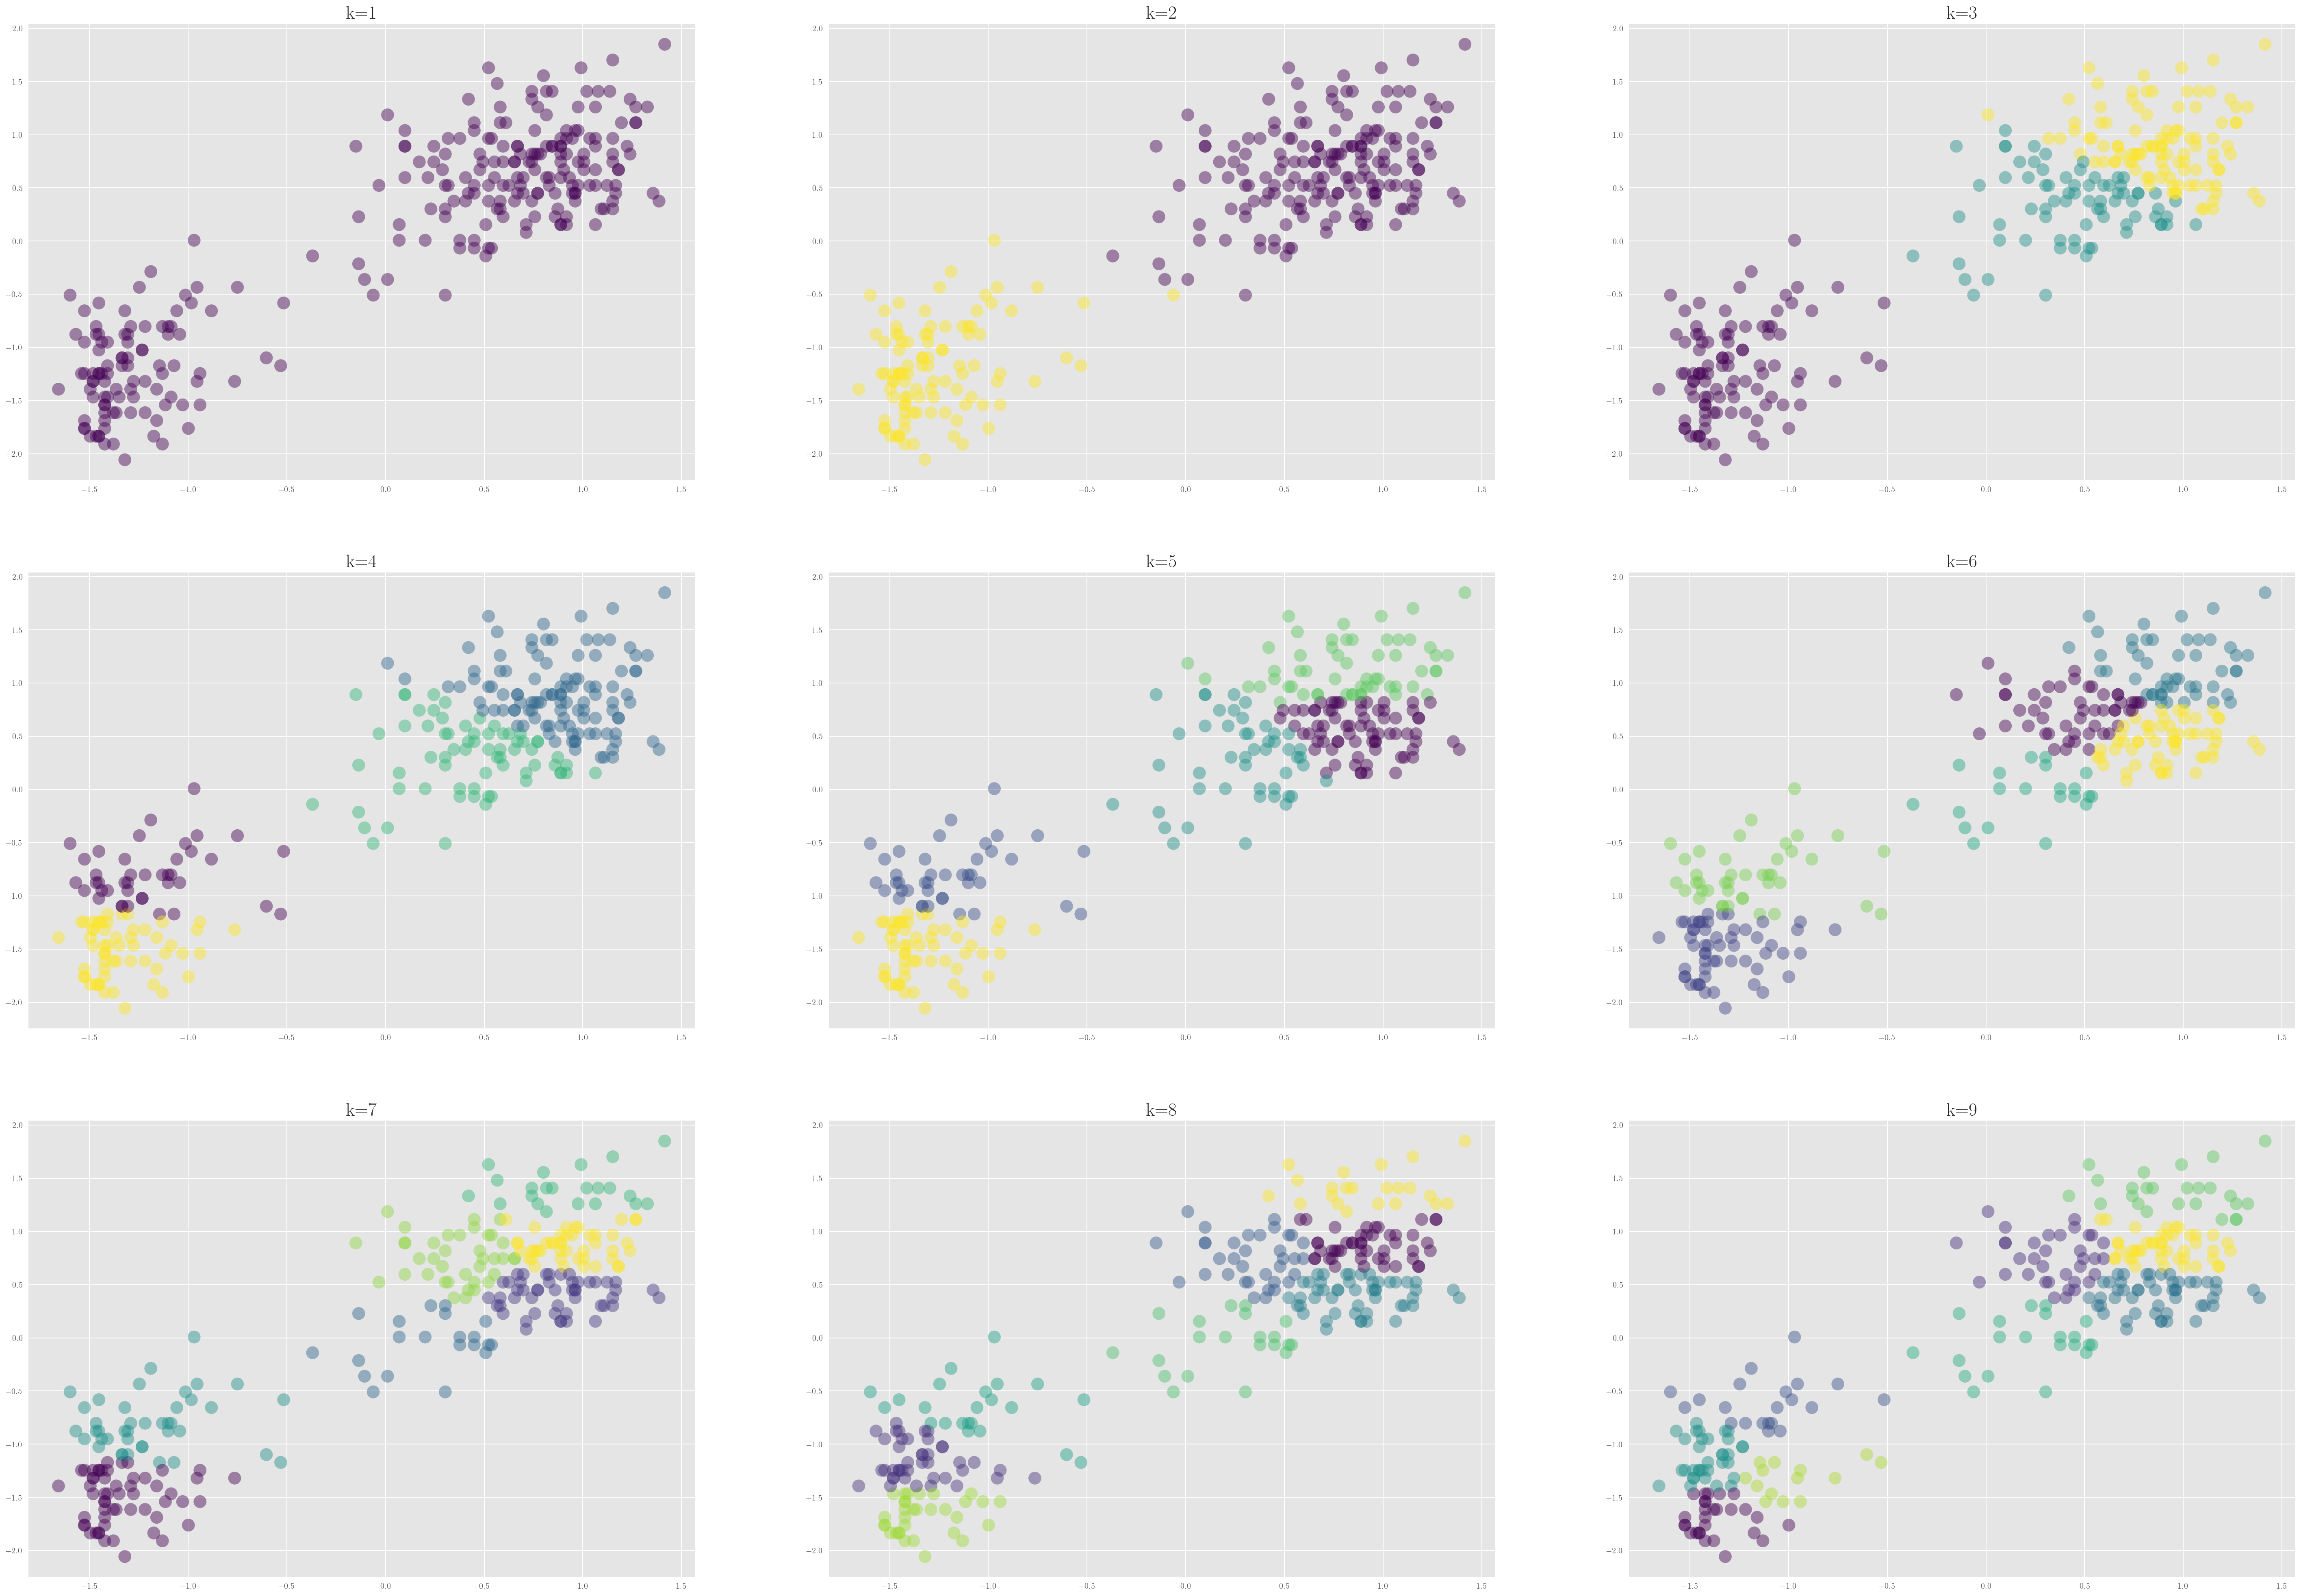

In [9]:
plt.rcParams['figure.figsize'] = (50, 60)
plot_kwds = {'alpha' : 0.45, 's' : 250, 'linewidths':0, }
X = data
wss = []
for i in range (1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    kmeans.predict(X)
    y=kmeans.labels_
    wss.append(kmeans.inertia_)
    
    # Draw a plot
    fig = plt.subplot(5, 3, i)
    fig.scatter(X['eruptions'], X['waiting'], c=y, **plot_kwds, cmap='viridis')
    title = "k={0}".format(i)
    fig.set_title(title)
plt.show()    

### Scree plot

Visually, it appears that the best number of clusters is two. Let us confirm this from the clustering metric WSS (inertia) for the various values of the hyperparameter $k$.

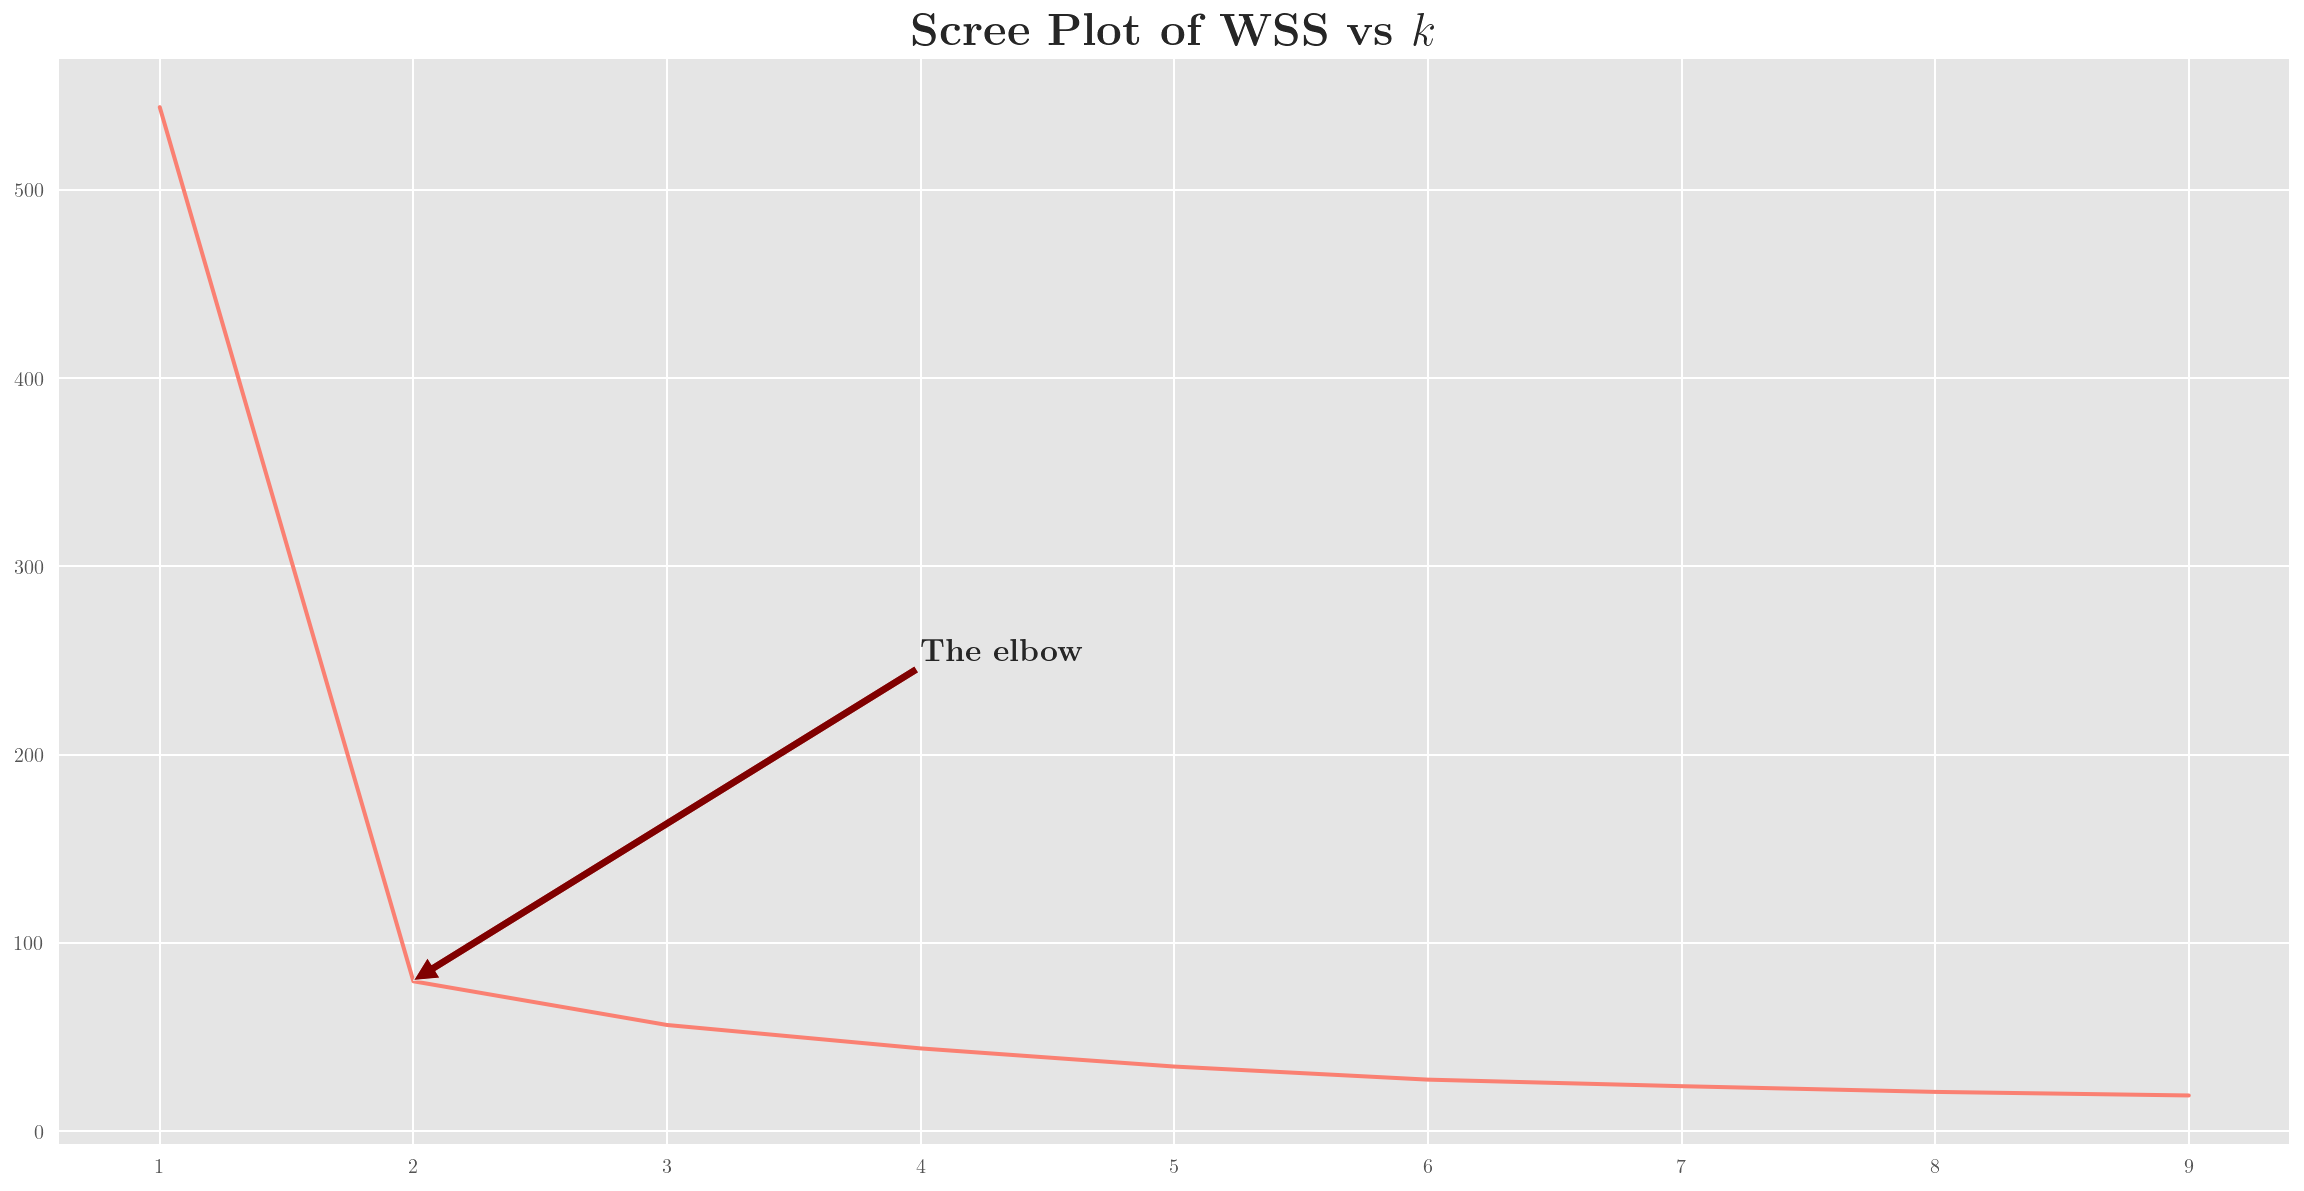

In [10]:
# Now, draw the scree-plot.
fig = plt.figure(figsize=(20, 10))
plt.plot(range(1, 10), wss, alpha=1.0, c='salmon', lw=2)
plt.grid(True)
plt.title(r'\textbf{Scree Plot of WSS vs $k$}')

# annotation to explain
plt.annotate(text=r'\textbf{The elbow}',
            xy = (2,80),
            xytext=(4, 250),
            arrowprops = dict(facecolor='maroon', width=4,)
            );

The scree-plot confirms that the optimal number of clusters is $k=2$, i.e. two clusters as we saw visually in the plot-grid of the previous section.